# Análise exploratória dados da Netflix:

- Relação de filmes e séries Netflix.
- Quais São as 5 Categorias de Filmes Mais Comuns na netflix? e de séries ? 
- Qual o número de Filmes e Séries por ano. 
- Qual filme e série com maior duração ? 
- Distribuição de programas por indicação etária.
- Qual o Número de Filmes Produzidos Por País?
- Distribuição de filmes e séries nacionais por país

# Carregar bibliotecas

In [2]:
#Importar os pacotes para análise.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
from seaborn import palplot
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict
%matplotlib inline  

# Carregar DataFrame

In [26]:
df = pd.read_csv('netflix_titles.csv') #Criação do DataFrame

In [4]:
#Conecta no DataBase. (Se o DB não existir um é cirado com o nome ().
conn = sqlite3.connect("netflix_titles.db")

In [ ]:
#Armazena a tabela.csv no banco de dados.
df.to_sql('netflix_titles', conn)

# Tratamento de dados

In [5]:
df.head() #Mostra as 5 primeiras linhas do DF

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Excluir as colunas que não serão usadas e tratar os NaN

In [30]:
df = df.drop(columns=['cast', 'description','director']) #exclui a coluna selecionada

In [36]:
df['country'] = df['country'].fillna(df['country'].mode()[0]) #Substitui os NaN pelo nome mais usado. mode é a moda

In [37]:
df.drop_duplicates(inplace= True)

In [39]:
df.isnull().sum() #Mostra a quantidade de itens NaN no DF

show_id          0
type             0
title            0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
dtype: int64

In [40]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries
1,s2,TV Show,Blood & Water,South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries"
2,s3,TV Show,Ganglands,United States,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
3,s4,TV Show,Jailbirds New Orleans,United States,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV"
4,s5,TV Show,Kota Factory,India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ..."


# Análise

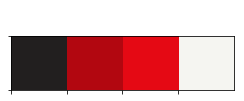

In [44]:
palplot(['#221f1f', '#b20710', '#e50914','#f5f5f1'])
plt.title("Netflix brand palette ",loc='left', fontsize=15,y=1.2, color = 'White')
plt.show()

## 1 - Relação de filmes e séries Netflix:

In [45]:
cons1 = df.groupby(['type'])['type'].count() #Agrupa os dados por tipo e soma
print(cons1)

type
Movie      6131
TV Show    2676
Name: type, dtype: int64


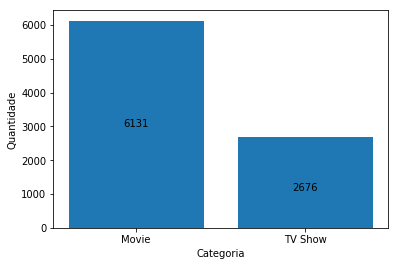

In [46]:
plt.figure(facecolor='White') #Cria a figura com o plano de fundo branco

plt.bar(cons1.index, cons1) #A partir do cons1, cria duas colunas e  index = os cria a coluna com os dados. 

plt.xlabel('Categoria') #Da o nome do eixo x

plt.ylabel('Quantidade') # Da o nome do eixo y

plt.text(1, 1100, str(cons1[1]), ha='center') #Coloca o texto no centro do gráfico

plt.text(0, 3000, str(cons1[0]), ha='center')#Coloca o texto no centro do gráfico

plt.show() #Exibe a figura

plt.txt(Seleciona a coluna que vai ter o texto, a altura do texto na barra, a altura da barra)

ha e va = usa para posicionar o indice

In [47]:
Porcentagem_Filmes = round((cons1[0]/(cons1[0]+cons1[1])) * 100)
Porcentagem_Series = round((100 - Porcentagem_Filmes))
print(Porcentagem_Filmes,Porcentagem_Series)

70 30


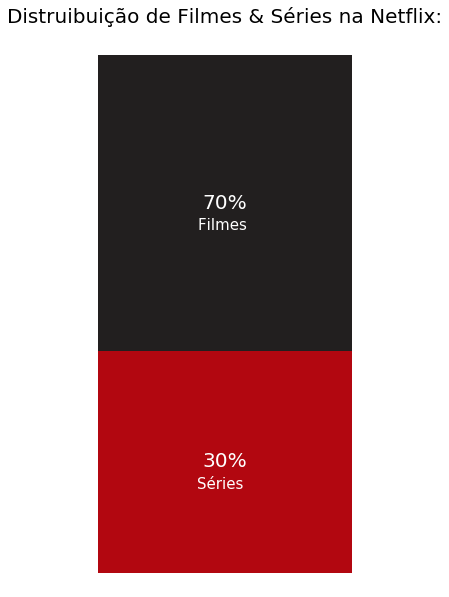

In [48]:
fig1 = plt.figure(figsize=(5, 10), facecolor='White')
 
plt.title('Distruibuição de Filmes & Séries na Netflix:', ha='center',color='Black',  fontsize='20')

plt.bar('Movie', Porcentagem_Filmes, color='#221f1f')

plt.bar('Movie', Porcentagem_Series, color='#b20710')

plt.text(0, 15, str(Porcentagem_Series) + '%', ha='center',va='center',fontsize=20, color='White')
plt.text(0, 12, str('Séries  '), ha='center',va='center',fontsize=15, color='White')

plt.text(0, 50, str(Porcentagem_Filmes) + '%', ha='center', va='center',fontsize=20, color='White')
plt.text(0, 47, str('Filmes '), ha='center', va='center', fontsize=15, color='White')

plt.axis('off') #Apaga a borda do gráfico

plt.show()

Embora ao se utilizar a Netflix a impressão é que existem mais séries que filmes, a análise mostra que o catálogo de filmes é muito mais vasto.

## 2 - Quais São as 5 Categorias de Filmes Mais Comuns na netflix? e de séries ?

## Filmes

In [50]:
cons2 = '''
SELECT listed_in AS genero
FROM netflix_titles
WHERE type = 'Movie' 
'''

res2 = pd.read_sql(cons2, conn)
res2['genero'] = res2['genero'].apply(lambda x: x.lower(), lambda x: x.str())
temp = res2['genero']
#Método apply é usado para usar um atributo no dicionario. Usando uma função lambda

In [51]:
res2.isnull().sum()

genero    0
dtype: int64

In [52]:
#criar um vetor usando expressão regular para filtrar as strings

padrao = '(?u)\\b[\\w-]+\\b'

vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)

In [53]:
# Aplica a vetorização ao dataset sem valores NA
bag_generos = vetor.transform(temp)

In [54]:
# Retorna gêneros únicos
generos_unicos =  vetor.get_feature_names()

In [55]:
# Cria o dataframe de gêneros
generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)

In [56]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6131 entries, 0 to 6130
Data columns (total 27 columns):
action           6131 non-null int64
adventure        6131 non-null int64
anime            6131 non-null int64
children         6131 non-null int64
classic          6131 non-null int64
comedies         6131 non-null int64
comedy           6131 non-null int64
cult             6131 non-null int64
documentaries    6131 non-null int64
dramas           6131 non-null int64
faith            6131 non-null int64
family           6131 non-null int64
fantasy          6131 non-null int64
features         6131 non-null int64
horror           6131 non-null int64
independent      6131 non-null int64
international    6131 non-null int64
lgbtq            6131 non-null int64
movies           6131 non-null int64
music            6131 non-null int64
musicals         6131 non-null int64
romantic         6131 non-null int64
sci-fi           6131 non-null int64
spirituality     6131 non-null int64
sport

In [57]:
generos.head()

,action,adventure,anime,children,classic,comedies,comedy,cult,documentaries,dramas,...,lgbtq,movies,music,musicals,romantic,sci-fi,spirituality,sports,stand-up,thrillers
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0


In [58]:
#Exclui uma coluna
generos = generos.drop(columns = ['international', 'movies', 'music', 'comedy', 'adventure', 'family'])
generos.rename(columns={'action':'action & adventure'}, inplace = True)
generos.rename(columns={'children':'family & children'}, inplace = True)

#As colunas excluidas são devido a gêneros que sempre aparecem juntos. Como adventure sempre junto a action, dessa forma seria uma repetição
#E ainda alterou-se o nome para a classificação completa.

In [59]:
ranking = pd.Series(generos.sum()).sort_values(ascending=False) #Soma os com nome igual e ordena do maior para o menor
print(ranking)

dramas                2427
comedies              1674
documentaries          869
action & adventure     859
independent            756
family & children      641
romantic               616
thrillers              577
musicals               375
horror                 357
stand-up               343
fantasy                243
sci-fi                 243
sports                 219
classic                116
lgbtq                  102
cult                    71
anime                   71
features                71
faith                   65
spirituality            65
dtype: int64


In [60]:
ranking_percentual = round(100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0], 2)
ranking_percentual

dramas                39.59
comedies              27.30
documentaries         14.17
action & adventure    14.01
independent           12.33
family & children     10.46
romantic              10.05
thrillers              9.41
musicals               6.12
horror                 5.82
stand-up               5.59
fantasy                3.96
sci-fi                 3.96
sports                 3.57
classic                1.89
lgbtq                  1.66
cult                   1.16
anime                  1.16
features               1.16
faith                  1.06
spirituality           1.06
dtype: float64

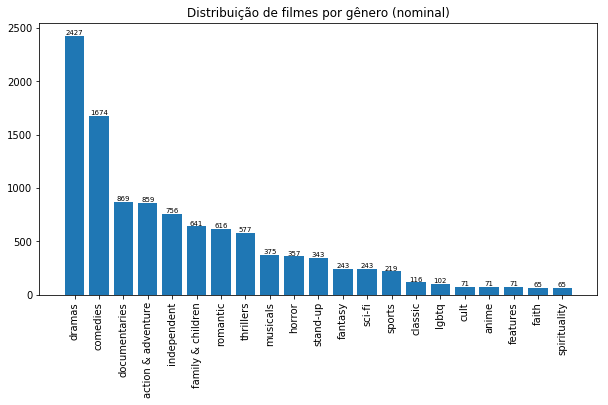

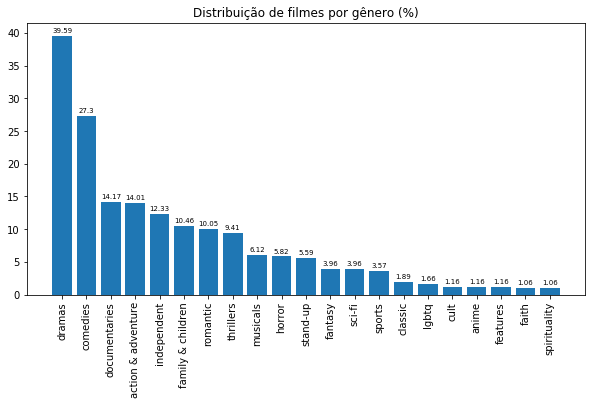

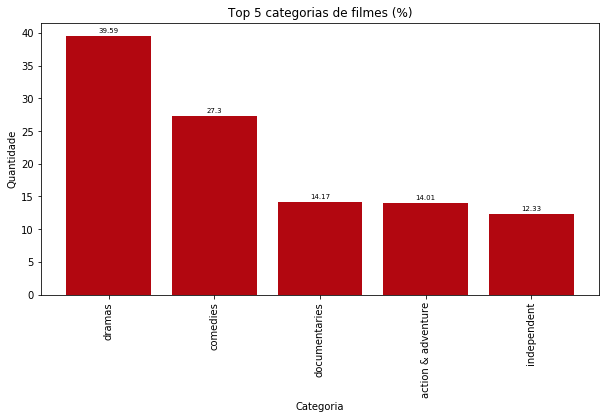

In [65]:
plt.figure(figsize=(10,5), facecolor='White')
plt.title('Distribuição de filmes por gênero (nominal)', color='Black')
plt.bar(ranking.index, ranking)
plt.xticks(rotation=90)
for i, c in enumerate(ranking):
    plt.text(i, c+10, c, ha='center', fontsize=7)


plt.figure(figsize=(10,5), facecolor='White')
plt.title('Distribuição de filmes por gênero (%)', color='Black')
plt.bar(ranking_percentual.index, ranking_percentual)
plt.xticks(rotation=90)
for i, c in enumerate(ranking_percentual):
    plt.text(i, c+0.5, c, ha='center', fontsize=7)

top6 = ranking_percentual[:5]    

fig2 = plt.figure(figsize=(10,5), facecolor='White')
plt.title('Top 5 categorias de filmes (%)', color='Black')
plt.bar(top6.index, top6, color = '#b20710')
plt.xticks(rotation=90)
plt.xlabel('Categoria')
plt.ylabel('Quantidade')
for i, c in enumerate(top6):
    plt.text(i, c+0.5, c, ha='center', fontsize=7)

plt.show()

### De acordo com a análise explorátoria as 5 categorias com mais filmes são: **Dramas**, **Comédias**, **Documentários**, **Ação e Aventura** e **independentes**.


## Série

In [66]:
cons3 = '''SELECT listed_in AS genero
FROM netflix_titles
WHERE type = "TV Show"
'''

In [67]:
res3 = pd.read_sql(cons3, conn)
res3.head()

,genero
0,"International TV Shows, TV Dramas, TV Mysteries"
1,"Crime TV Shows, International TV Shows, TV Act..."
2,"Docuseries, Reality TV"
3,"International TV Shows, Romantic TV Shows, TV ..."
4,"TV Dramas, TV Horror, TV Mysteries"


In [68]:
def genunico(df):
    df['genero'] = df['genero'].apply(lambda x: x.lower(), lambda x: x.str())
    temp = df['genero']
    padrao = '(?u)\\b[\\w-]+\\b'
    vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)
    bag_generos = vetor.transform(temp)
    generos_unicos =  vetor.get_feature_names()
    generos = pd.DataFrame(bag_generos.todense(), columns = generos_unicos, index = temp.index)
    return generos
    print('generos')

In [69]:
generos = genunico(res3)

In [70]:
generos.head()

,action,adventure,anime,british,classic,comedies,comedy,crime,cult,docuseries,...,sci-fi,science,series,shows,spanish-language,stand-up,talk,teen,thrillers,tv
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,3
1,1,1,0,0,0,0,0,1,0,0,...,0,0,0,2,0,0,0,0,0,3
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,2,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [71]:
generos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2676 entries, 0 to 2675
Data columns (total 30 columns):
action              2676 non-null int64
adventure           2676 non-null int64
anime               2676 non-null int64
british             2676 non-null int64
classic             2676 non-null int64
comedies            2676 non-null int64
comedy              2676 non-null int64
crime               2676 non-null int64
cult                2676 non-null int64
docuseries          2676 non-null int64
dramas              2676 non-null int64
fantasy             2676 non-null int64
horror              2676 non-null int64
international       2676 non-null int64
kids                2676 non-null int64
korean              2676 non-null int64
mysteries           2676 non-null int64
nature              2676 non-null int64
reality             2676 non-null int64
romantic            2676 non-null int64
sci-fi              2676 non-null int64
science             2676 non-null int64
series       

In [72]:
generos.sum()

action               168
adventure            168
anime                176
british              253
classic               28
comedies             581
comedy                56
crime                470
cult                  28
docuseries           395
dramas               763
fantasy               84
horror                75
international       1351
kids                 451
korean               151
mysteries             98
nature                92
reality              255
romantic             370
sci-fi                84
science               92
series               176
shows               2910
spanish-language     174
stand-up              56
talk                  56
teen                  69
thrillers             57
tv                  5506
dtype: int64

In [73]:
generos = generos.drop(columns=['fantasy', 'comedy', 'international', 'series', 'tv', 'nature', 'classic', 'shows'])
generos.rename(columns={'action':'action & adventure'}, inplace = True)

In [74]:
ranking = pd.Series(generos.sum()).sort_values(ascending=False)
print(ranking)

dramas                763
comedies              581
crime                 470
kids                  451
docuseries            395
romantic              370
reality               255
british               253
anime                 176
spanish-language      174
adventure             168
action & adventure    168
korean                151
mysteries              98
science                92
sci-fi                 84
horror                 75
teen                   69
thrillers              57
stand-up               56
talk                   56
cult                   28
dtype: int64


In [75]:
ranking_percentual = round(100 * pd.Series(generos.sum()).sort_values(ascending = False) / generos.shape[0], 2)
ranking_percentual

dramas                28.51
comedies              21.71
crime                 17.56
kids                  16.85
docuseries            14.76
romantic              13.83
reality                9.53
british                9.45
anime                  6.58
spanish-language       6.50
adventure              6.28
action & adventure     6.28
korean                 5.64
mysteries              3.66
science                3.44
sci-fi                 3.14
horror                 2.80
teen                   2.58
thrillers              2.13
stand-up               2.09
talk                   2.09
cult                   1.05
dtype: float64

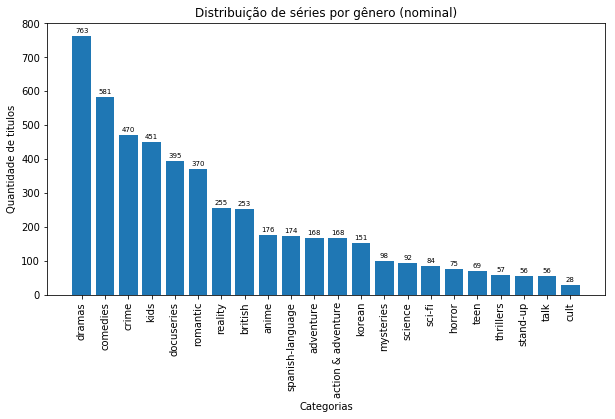

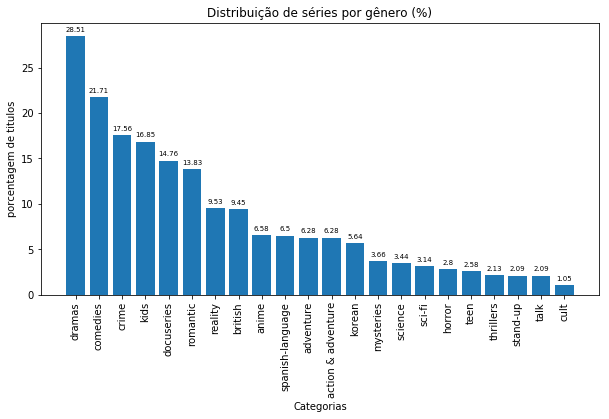

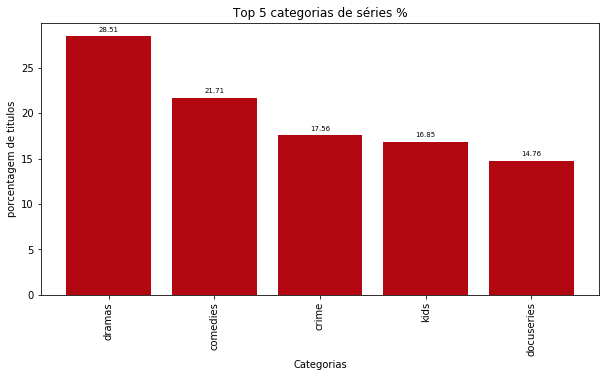

In [77]:
plt.figure(figsize=(10,5), facecolor='White')
plt.title('Distribuição de séries por gênero (nominal)', color='Black')
plt.bar(ranking.index, ranking)
plt.xticks(rotation=90)
for i, c in enumerate(ranking):
    plt.text(i, c+10, c, ha='center', fontsize=7)

plt.xlabel('Categorias')
plt.ylabel('Quantidade de titulos')

plt.figure(figsize=(10,5), facecolor='White')
plt.title('Distribuição de séries por gênero (%)', color='Black')
plt.bar(ranking_percentual.index, ranking_percentual)
plt.xticks(rotation=90)
for i, c in enumerate(ranking_percentual):
    plt.text(i, c+0.5, c, ha='center', fontsize=7)

plt.xlabel('Categorias')
plt.ylabel('porcentagem de titulos')    
    
    
top6 = ranking_percentual[:5]    

fig3 = plt.figure(figsize=(10,5), facecolor='White')
plt.title('Top 5 categorias de séries %', color='Black')
plt.bar(top6.index, top6, color = '#b20710')
plt.xticks(rotation=90)
for i, c in enumerate(top6):
    plt.text(i, c+0.5, c, ha='center', fontsize=7)

plt.xlabel('Categorias')
plt.ylabel('porcentagem de titulos')  

plt.show()

## De acordo com a análise explorátoria as 5 categorias com mais filmes são: **Dramas**, **Comédias**, **Crimes**, **infantis** e **documentarios**.


## Seletor de gênero:

In [78]:
cons4 = ''' SELECT type, listed_in AS genero
            FROM netflix_titles
        '''
res4 = pd.read_sql(cons4, conn)

generos = genunico(res4)

In [79]:
def listaFilme(gen):
    lista = generos[gen]
    for i, v in enumerate(lista):
        if v is 1:
            print(df['title'][i])
               

In [ ]:
listaFilme('faith')

## 3 - Qual o número de Filmes e Séries por ano.

In [80]:
def anounico(df_semNaN):
    df_semNaN['ano'] = df_semNaN['ano'].apply(lambda x: x.lower(), lambda x: x.str())
    temp = df_semNaN['ano']
    padrao = '(?u)\\b[\\w-]+\\b'
    vetor = CountVectorizer(token_pattern = padrao, analyzer = 'word').fit(temp)
    bag_ano = vetor.transform(temp)
    ano_unico = vetor.get_feature_names()
    df_anos = pd.DataFrame(bag_ano.todense(), columns = ano_unico, index = temp.index)
    return df_anos

In [81]:
#DataFrame sem valor NaN (como a análise da questão 3 tratará apenas das categorias 
#de series e filmes, não há problema em 0 as outras colunas visto que a analisada está completa e sem interferencia das outras)
df_semNaN = df.fillna(0)

In [82]:
#Faz a consulta para manter apenas os filmes e anos.
#Faz a soma para criar a base para o DataFrame
cons5 = '''SELECT type AS tipo, date_added AS ano
        FROM netflix_titles
        WHERE date_added > 2000 and tipo = 'Movie'
        '''
res5 = pd.read_sql(cons5, conn)
ano = anounico(res5)
filmeAno = ano.drop(columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '31',
                        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                        'april', 'august', 'december', 'february', 'january', 'july',
                        'june', 'march', 'may', 'november', 'october',  'september'])

In [83]:
#Faz a consulta para manter apenas as séries e anos.
#Faz a soma para criar a base para o DataFrame
cons6 = '''SELECT type AS tipo, date_added AS ano
        FROM netflix_titles
        WHERE date_added >= 2000 and tipo = 'TV Show'
        '''
res6 = pd.read_sql(cons6, conn)
ano = anounico(res6)
serieAno = ano.drop(columns=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '31',
                        '11', '12', '13', '14', '15', '16', '17', '18', '19', '20',
                        '21', '22', '23', '24', '25', '26', '27', '28', '29', '30',
                        'april', 'august', 'december', 'february', 'january', 'july',
                        'june', 'march', 'may', 'november', 'october',  'september'])


In [84]:
filmeAno = filmeAno.sum()
serieAno = serieAno.sum()

Text(0,0.5,'Títulos adicionados')

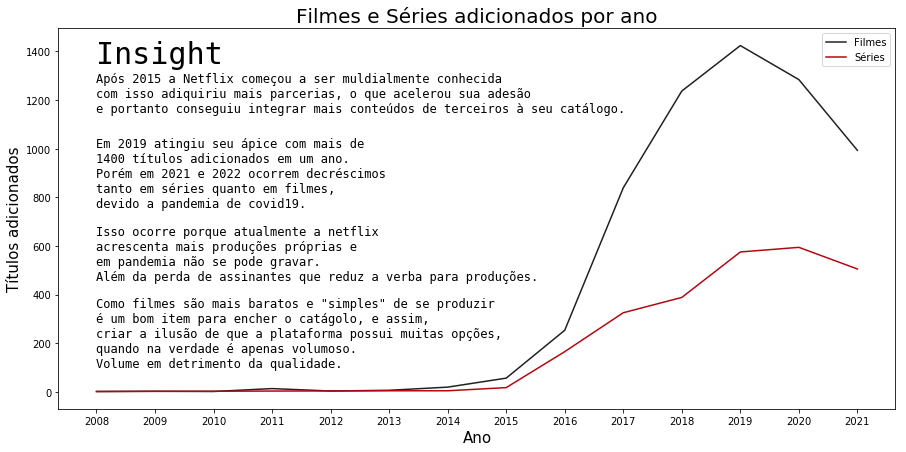

In [86]:
fig4 = plt.figure(figsize = (15, 7), facecolor = 'white')
plt.title('Filmes e Séries adicionados por ano', fontsize=20)
plt.plot(filmeAno.index, filmeAno, color='#221f1f')
plt.plot(serieAno.index, serieAno, color='#b20710')
plt.legend(['Filmes', 'Séries'])
plt.xlabel('Ano')
plt.ylabel('Quantidade')

plt.text(0, 1350, f'Insight', fontsize='30', fontname = 'monospace')
plt.text(0, 1150, f'Após 2015 a Netflix começou a ser muldialmente conhecida\ncom isso adiquiriu mais parcerias, o que acelerou sua adesão \ne portanto conseguiu integrar mais conteúdos de terceiros à seu catálogo.', fontsize='12', fontname='monospace')
plt.text(0, 760,  f'Em 2019 atingiu seu ápice com mais de \n1400 títulos adicionados em um ano. \nPorém em 2021 e 2022 ocorrem decréscimos \ntanto em séries quanto em filmes, \ndevido a pandemia de covid19.', fontsize='12', fontname='monospace')
plt.text(0, 460,  f'\nIsso ocorre porque atualmente a netflix \nacrescenta mais produções próprias e \nem pandemia não se pode gravar.\nAlém da perda de assinantes que reduz a verba para produções.', fontsize='12', fontname='monospace')
plt.text(0, 100,  f'Como filmes são mais baratos e "simples" de se produzir \né um bom item para encher o catágolo, e assim, \ncriar a ilusão de que a plataforma possui muitas opções, \nquando na verdade é apenas volumoso.\nVolume em detrimento da qualidade.', fontsize='12', fontname='monospace')

plt.xlabel('Ano', size=(15))
plt.ylabel('Títulos adicionados', size=(15))

## 4 - Qual filme e série com maior duração ?

In [87]:
cons7 = '''SELECT type AS tipo, duration AS duracao, release_year AS lancamento
        FROM netflix_titles
        WHERE tipo = "TV Show"'''
res7 = pd.read_sql(cons7, conn)

In [88]:
from collections import defaultdict
resSerie = defaultdict(list)
for c in range(2676):
    a = res7['duracao'][c][0]
    resSerie[a].append(a)

In [89]:
cons8 = '''SELECT title AS titulo, duration as duracao
        FROM netflix_titles
        WHERE duration= "9 Seasons"
        '''
res8 = pd.read_sql(cons8, conn)
res8

,titulo,duracao
0,The Great British Baking Show,9 Seasons
1,Saved by the Bell,9 Seasons
2,Still Game,9 Seasons
3,American Horror Story,9 Seasons
4,Call the Midwife,9 Seasons
5,Naruto,9 Seasons
6,Forensic Files,9 Seasons
7,Club Friday The Series 6,9 Seasons
8,The Office (U.S.),9 Seasons


In [90]:
cons9 = '''SELECT duration AS duracao
        FROM netflix_titles
        WHERE type = "Movie"
        '''
res9 = pd.read_sql(cons9, conn)

In [91]:
resFilme = defaultdict(list)
for c in range(2676):
    a = res9['duracao'][c][0:3]
    resFilme[a].append(a)

In [92]:
cons9 = '''SELECT title AS titulo, duration AS duracao
        FROM netflix_titles
        WHERE duracao = "253 min"
        '''
res9 = pd.read_sql(cons9, conn)
res9

,titulo,duracao
0,The School of Mischief,253 min


O filme com maior duração é o The Schol of Mischief com cerca de 4h de duração.

## 5- Distribuição de programas por indicação etária 

In [93]:
cons11 = '''SELECT rating AS classificacao, count(*) AS quantidade
            FROM netflix_titles
            WHERE type == 'Movie' and classificacao != '74 min' and classificacao != '84 min' and classificacao != '66 min' and classificacao != 'None'
            GROUP BY classificacao 
        '''
res11 =  pd.read_sql(cons11, conn)
res11 = res11.sort_values(by='quantidade')
res11 = res11.astype(str)

cons12 = '''SELECT rating AS classificacao, count(*) AS quantidade
            FROM netflix_titles
            WHERE type == 'TV Show' and classificacao != '74 min' and classificacao != '84 min' and classificacao != '66 min' 
            GROUP BY classificacao 
        '''
res12 =  pd.read_sql(cons12, conn)
res12 = res12.sort_values(by='quantidade')
res12 = res12.astype(str)

In [94]:
res11_int = res11['quantidade'].astype(int)
for valor in res11_int:
    pos = res11_int
    
res12_int = res12['quantidade'].astype(int)
for valor in res12_int:
    neg = -res12_int


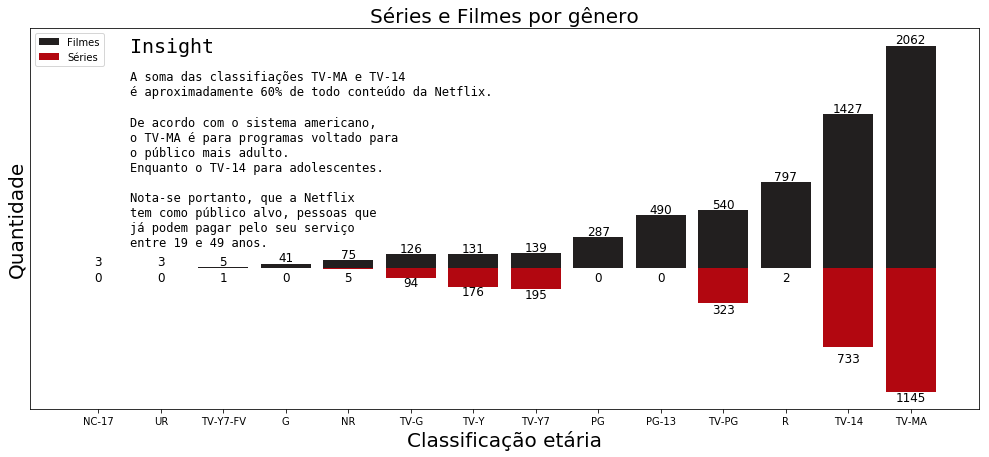

In [96]:
fig5 = plt.figure(figsize = (17, 7), facecolor = 'white')
plt.title('Séries e Filmes por gênero', fontsize=20)
plt.bar(res11['classificacao'], pos, color=['#221f1f'])
plt.bar(res12['classificacao'], neg, color=['#b20710'])
plt.xlabel('Classificação etária', fontsize=20)
plt.ylabel('Quantidade', fontsize=20)
plt.yticks([])  
for i, c in enumerate(pos):
    plt.text(i, c+20, c, ha='center', fontsize=12, color='black')
plt.text(0, -150, 0, ha='center', fontsize=12, va='bottom')
plt.text(1, -150, 0, ha='center', fontsize=12, va='bottom')
plt.text(2, -150, 1, ha='center', fontsize=12, va='bottom')
plt.text(3, -150, 0, ha='center', fontsize=12, va='bottom')
plt.text(4, -150, 5, ha='center', fontsize=12, va='bottom')
plt.text(5, -200, 94, ha='center', fontsize=12, va='bottom')
plt.text(6, -280, 176, ha='center', fontsize=12, va='bottom')
plt.text(7, -310, 195, ha='center', fontsize=12, va='bottom')
plt.text(8, -150, 0, ha='center', fontsize=12, va='bottom')
plt.text(9, -150, 0, ha='center', fontsize=12, va='bottom')
plt.text(10, -450, 323, ha='center', fontsize=12, va='bottom')
plt.text(11, -150, 2, ha='center', fontsize=12, va='bottom')
plt.text(12, -900, 733, ha='center', fontsize=12, va='bottom')
plt.text(13, -1260, 1145, ha='center', fontsize=12, va='bottom')

plt.legend(['Filmes', 'Séries'])

plt.text(0.5, 2000, 'Insight',fontname = 'monospace', fontsize='20')
plt.text(0.5, 1600, 'A soma das classifiações TV-MA e TV-14 \né aproximadamente 60% de todo conteúdo da Netflix.',fontname = 'monospace', fontsize='12')
plt.text(0.5, 900, 'De acordo com o sistema americano, \no TV-MA é para programas voltado para \no público mais adulto. \nEnquanto o TV-14 para adolescentes.',fontname = 'monospace', fontsize='12')
plt.text(0.5, 200, 'Nota-se portanto, que a Netflix\ntem como público alvo, pessoas que \njá podem pagar pelo seu serviço \nentre 19 e 49 anos.',fontname = 'monospace', fontsize='12')
plt.show()

## 7 - Qual o Número de Filmes Produzidos Por País?

In [97]:
df['first_country'] = df['country'].apply(lambda x: x.split(",")[0])#Separa uma frase pelas ','


df['first_country'].replace('United States', 'USA', inplace=True)
df['first_country'].replace('United Kingdom', 'UK', inplace=True)
#Troca o primeiro nome pelo segundo

In [98]:
contagem = df.groupby('first_country')['show_id'].count().sort_values(ascending = False) #groupby - agrupa pela coluna entre (), o count vai contar a partir da coluna que vem antes. Agrupa pelo firstcountry e conta pelo show_id

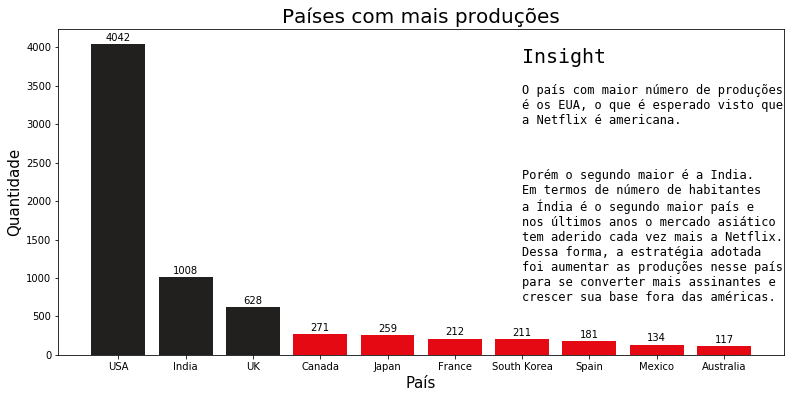

In [100]:
fig6 = plt.figure(figsize=(13,6), facecolor='white')
plt.title('Países com mais produções', fontsize='20')
plt.bar(contagem.index[0:3], contagem[0:3], color = '#221f1f')
for i, c in enumerate(contagem[0:3]):
    plt.text(i, c+40, c, ha='center', fontsize=10)
plt.bar(contagem.index[3:10], contagem[3:10],  color = '#e50914')
for i, c in enumerate(contagem[3:10]):
    plt.text(i+3, c+40, c, ha='center', fontsize=10)
plt.xlabel('País', fontsize = '15')
plt.ylabel('Quantidade', fontsize = '15')

plt.text(6, 3800, 'Insight',fontname = 'monospace', fontsize = '20')
plt.text(6, 3000, 'O país com maior número de produções \né os EUA, o que é esperado visto que \na Netflix é americana.',fontname = 'monospace', fontsize='12')
plt.text(6, 700, 'Porém o segundo maior é a India.\nEm termos de número de habitantes \na Índia é o segundo maior país e \nnos últimos anos o mercado asiático \ntem aderido cada vez mais a Netflix. \nDessa forma, a estratégia adotada \nfoi aumentar as produções nesse país \npara se converter mais assinantes e \ncrescer sua base fora das américas.',fontname = 'monospace', fontsize='12')

plt.show()

## Distribuição de filmes e séries nacionais por país

In [101]:
country_order = df['first_country'].value_counts()[:11].index
pais_tipo = df[['type', 'first_country']].groupby('first_country')['type'].value_counts().unstack().loc[country_order]
pais_tipo['sum'] = pais_tipo.sum(axis=1)
pais_tipo_perc = 100 * (pais_tipo.T / pais_tipo['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)

In [ ]:
fig7 = plt.figure(figsize=(15,7), facecolor='white')
plt.title('Distribuição de filmes e séries nacionais por país', fontsize='20')
plt.barh(pais_tipo_perc.index, pais_tipo_perc['Movie'], color = '#221f1f', )
plt.barh(pais_tipo_perc.index, pais_tipo_perc['TV Show'], color = '#b20710', left=pais_tipo_perc['Movie'])
plt.gca().get_xaxis().set_visible(False)

for i in pais_tipo_perc.index:
    plt.annotate(f'{round(pais_tipo_perc["Movie"][i],2)}%', xy=(pais_tipo_perc['Movie'][i]/2,i), ha = 'center', fontsize=10, color = 'white')
    
for i in pais_tipo_perc.index:
    plt.annotate(f'{round(pais_tipo_perc["TV Show"][i],2)}%', xy=(pais_tipo_perc['Movie'][i]+pais_tipo_perc['TV Show'][i]/2,i), va = 'center', fontsize=10, color = 'white')
    
plt.legend(['Filmes', 'Séries'])

plt.show()

Pode-se notar que a Netflix adapta suas produções de acordo com o perfil dos consumidores.